# L - fold cross validation for KNN Regressor

####  When test data is no provided it is impossible to select the best K by using KNN from only training data, as at k=0 it gives error as zero. In this case, L-fold cross validation is widely used. the training dat is divided into L folds. KNN trained with L-1 folds and tested with the remaning 1 fold to find the best K value. 


Below are the tasks that are being carried out in this - 

i.   Implementing L-fold cross validation that can accept multiple inputs

ii.  Error plots for train and test data w.r.t 1/K

iii. Report

In [48]:
# importing required libraries
library(reshape2)
library(ggplot2)

#### Loading training and testing data provided. 

In [1]:
train = read.csv(file='Task1A_train.csv')
test = read.csv(file='Task1A_test.csv')

dim(train)
# first five rows of train and test data
head(train)
head(test)

[1] 42  2

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In [50]:
# seperating the dependent(value to be predicted 'Y') and independent variables ('X') 

train.data = train[1] # 1st column of train data is X
train.label = train[,2] # second or the last column is Y

test.data = test[1]
test.label=test[,2]

# preview of how the variables are
head(train.data)
head(test.data)
head(train.label)

x1
1960.0
1960.5
1961.0
1961.5
1962.0
1962.5


x1
1960.25
1960.75
1961.25
1961.75
1962.25
1962.75


[1] 0.71 0.85 0.61 0.92 0.72 0.92

Implementing KNN regressor

In [51]:
# average function to calculate the average of the nearest neighbours.
average = function(train.label){
    ## get the average of all the samples
    return(mean(train.label))
}

inputs of KNN function are (x variable of train data , y variable of train data , x variable of test data , K value)

output is the predicted y variables of test data.

In [52]:
knn <- function(train.data, train.label, test.data, K=3){ # by default using k = 3
    
    ## number of train samples
    train.len = nrow(train.data)
    
    ## number of test samples
    test.len = nrow(test.data)
    
    ## distances between samples using method 'euclidean'
    dist = as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample
    for (i in 1:test.len){
        
        ### fetching K nearest neighbours of test sample from training sampels
        nn = as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ### Average of these nearest neighbours is obatined using the average function
        test.label[i] = (average(train.label[nn]))
    }
    
    ## return predicted labels as output
    return (test.label)
    
}

#### Implementing CV function
inputs - training data , training labels, number of folds and K value

output - error for all the folds

In [77]:
cv = function(train.data,train.label,numFold=10,k=3){
    train.len = nrow(train.data)
    error=c()
    
    shuffle = sample(1:train.len,train.len,replace = F)
    train.data  = train.data[shuffle,,drop=FALSE]
    
    # grouping the indices of training data into the total groups according to the number of folds  
    indices = cut(seq(1,nrow(train.data)),breaks=numFold,labels=FALSE)
    #indices = c(1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,10,10,10,10,10)
    
    for (i in 1:numFold){
        
        # obtain the indices of group == i which gives the test indices 
        test.index = which(indices==i,arr.ind = TRUE)
        
        # creating the training data and labels ,  testing data and labels for this group
        test.data.fold = train.data[test.index, ,drop=FALSE] # drop = false donot convert the single column into array.
        train.data.fold = train.data[-test.index, ,drop=FALSE]
        train.label.fold = train.label[-test.index]
        test.label.fold = train.label[test.index] 
        
        # calculating MSE between test fold labels  and knn predicted labels. 
        error = c(error,c(sum((knn(train.data.fold, train.label.fold, test.data.fold,k) - test.label.fold)^2)/nrow(train.data.fold)))
        
        }
    #return the errors of all the folds.
    return (error)
    }



In [78]:
# sample ouptput for L-fold = 10 and k = 3 default
options(warn=-1)
cv(train.data,train.label,10)

[1]  38.44442  34.51477  32.57882  30.05346  22.04687  16.83849  17.52480
 [8]  21.47374  44.32920 124.21758

#### ii. Error plots of training and testing data w.r.t 1/K value fro L-fold = 10

In [88]:
# Fetching errors for the provide L-fold = 10 and k= [1,20]

k.max =20
numFold = 10

# dataframe to store the errors
fold.MSE=data.frame('k' = 1:k.max,'mse' = rep(0,k.max))

# for each k
for (k in 1:k.max){
    # mean of all the ouptputs i.e here 10 outputs for that k is caluculated
    fold.MSE[k,2] = mean(cv(train.data,train.label,numFold,k))
}

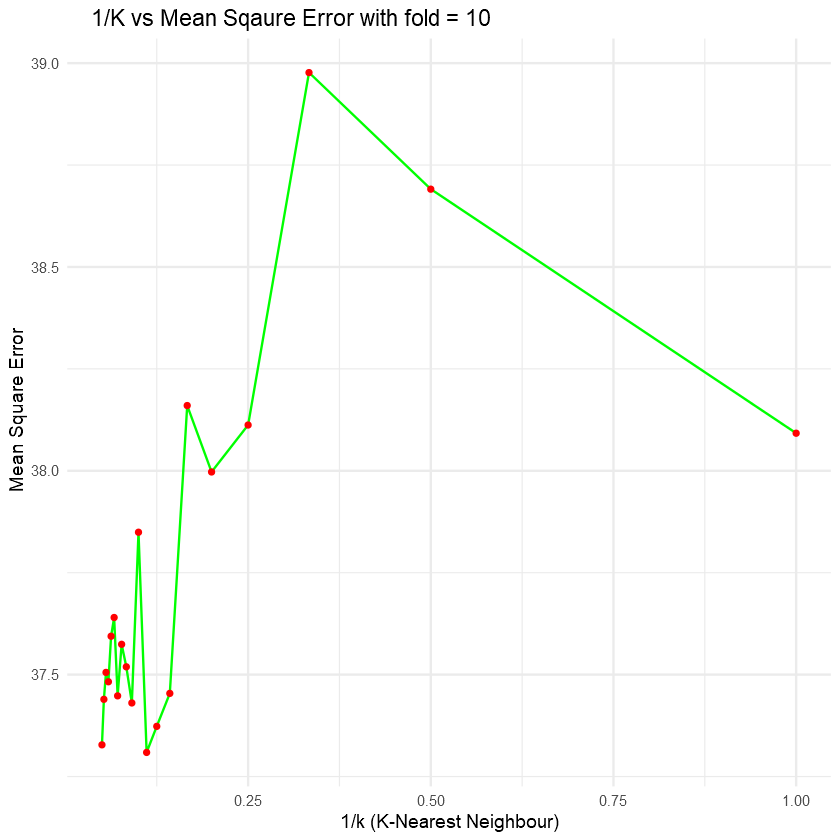

In [89]:
# plot for 1/K vs. Mean Square error with l-Fold = 10

ggplot(aes((1/k),mse),data = fold.MSE) + geom_line(color='green')+ geom_point(color = 'red',size = 1) + theme_minimal() +
       ggtitle("    1/K vs Mean Sqaure Error with fold = 10") + 
        xlab("1/k (K-Nearest Neighbour)") + ylab("Mean Square Error")

### iii. Report

Above plot shows that as k value increases, error decreases and reaches minimum value. Further more increase in K, makes the error unstable i.e it increases in some cases and decreases in other cases. The optimal value of K from above plot is k=9.